Simulation code for Algorithmic Feedback Synthesis for Robust Strong Invariance of Continous Control Systems

We shall first try to simulate a simple example. For that, we shall give some realizations to all the variables in the problem. <br>
1. Let us assume $v = 2$. Hence, we are dealing with $\mathbb{R}^2$ space. <br>
2. Let us define $\mathbb{X}$ to be the unit circle $:= \{(x_1, x_2) ~ | ~ x_1^2 + x_2^2 \leq 0.5\}$. <br>
3. Consequently, $bd(\mathbb{X}) = \{(x_1, x_2) ~ | ~ x_1^2 + x_2^2 = 0.5\}$ <br>
4. At a given point $x \in bd(\mathbb{X})$, the Clarke normal cone will then just be the vector joining the origin to $x$. <br>
5. Let us define the control system as follows: $\dot{x} = Fx + Gu$, where the noise is assumed to be 0. $\dot{x}, x$ are vectors of dimension 2. $F$ is a $2 \times 2$ square matrix. $u$ has dimension $m = 3$ and hence $G$ is a $2 \times 3$ matrix. <br>
6. We shall define $F$ and $G$ at a later position in the code. <br>
7. The equations, when looked at component wise then become $\dot{x_1} = x_1 + 0.5u_1 + u_2$ and $\dot{x_2} = 0.5u_1 + u_3$. <br>
8. Thus $x_2$ is completely controlled by $u$. Also $x_1$ and $x_2$ are in some sense independent.   <br>
9. We also need to define the admissible set $\mathbb{U}$ . Let us choose the unit sphere, so that the 0-sublevel set is given by $\Phi(z) = z_1^2 + z_2^2 + z_3^2 - 1 \leq 0$. <br>
10. We also need our open set $O$, so we define it as the region $\{(x_1, x_2) ~ | ~ x_1^2 + x_2^2 \leq 1\}$. Note that $\mathbb{X} \subset O$. <br>  
11. We define a dictionary $\mathfrak{D}$ of continuous functions. The important thing to note is that the functions $\psi$ map from $O ⟶ \mathbb{R}^m$ and hence we need to define them appropriately. <br>
12. We shall first define two dictionaries whose union is $\mathfrak{D}$. The first is $\mathfrak{D}_P$, the dictionary of polynomials (multinomials in this case). The second is $\mathfrak{D}_S$, the dictionary of sinusoids. Thus, we have $\mathfrak{D} = \mathfrak{D}_P \cup \mathfrak{D}_S$ and also $|\mathfrak{D}| = |\mathfrak{D}_P| + |\mathfrak{D}_S|$ <br>
13. Since $m = 3$, we have $d = 9 \times |\mathfrak{D}|$, and this is the dimension of $\omega$, as per the usual notation from DACC'22. <br>
<br>
After this, we start by writing small functions which aim at solving each of the minor parts of the problem.



**Function 1 (Sampling $l$)** <br>
Function: Due to the distinct geometry of our problem, the normal cone at $x$,  when intersected with the norm ball $\mathbb{B}[0,1]$, shall give just a single point. We leave the general case of computing and sampling $l$ to later iterations and provide code just for this very specific case.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def find_intersection_point(theta):
    # Step 1: Parametrize the unit circle
    x_circle = np.cos(theta)
    y_circle = np.sin(theta)

    # Step 2: Calculate the coordinates of the point on the unit circle
    point_on_circle = np.array([x_circle, y_circle])

    # Step 3: Find the normal vector
    normal_vector = np.array([-y_circle, x_circle])

    # Step 4: Parametric equation of the line formed by the normal vector
    def line_equation(t):
        return point_on_circle + t * normal_vector

    # Step 5: Substitute into the equation of the unit circle to find the intersection point
    def circle_equation(t):
        return np.dot(line_equation(t), line_equation(t)) - 1

    # Use a numerical solver to find the intersection point
    t_intersection = np.roots([1, 0, 1])  # Solve the quadratic equation

    # Calculate the intersection point
    intersection_point = line_equation(t_intersection[1])

    return intersection_point

Intersection point: [0.70710678+0.70710678j 0.70710678-0.70710678j]


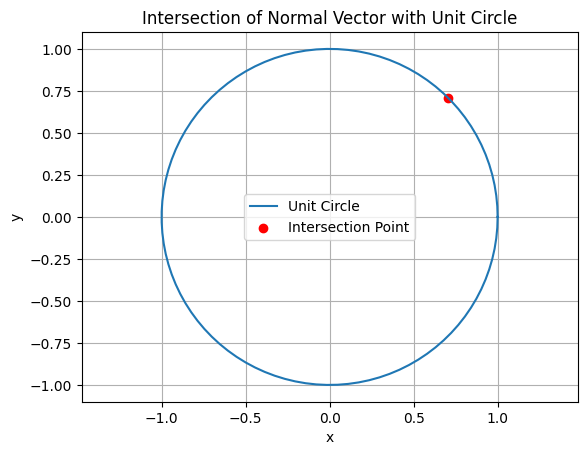

In [ ]:
# Example usage:
theta = np.pi / 4  # You can choose any angle
intersection_point = find_intersection_point(theta)

print("Intersection point:", intersection_point)

# Plotting for visualization
theta_values = np.linspace(0, 2 * np.pi, 100)
circle_x = np.cos(theta_values)
circle_y = np.sin(theta_values)

plt.plot(circle_x, circle_y, label='Unit Circle')
plt.scatter(*intersection_point, color='red', label='Intersection Point')
plt.title('Intersection of Normal Vector with Unit Circle')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

**Function 2 (Create Dictionary of Multinomials)** <br>
Function: I have been given the dimension, which is in this case $v = 2$, so that I am working in $\mathbb{R}^2$. Now I want to create a dictionary of basis functions with domain as given above which are multinomial functions up to order $k$. These a vector-valued functions, so I input a vector in $R^v$ and the output is a vector in $\mathbb{R}^m$. Note that this is a dictionary of functions and hence, if I input the value of $x \in \mathbb{R}^v$, I should be able to obtain the value of the functions at $x$. <br>
Input: I supply the values of $v$ (input dimension), $m$ (output dimension), $k$ (maximum degree) and $x$ and it should do the rest <br>  
Output: A dictionary of vector-valued basis functions. The number of basis functions will depend on $m$ and $v$ and can be calculated as $N = m \times (k + 1)^v$

Example: If I supply $v = 2$, $m = 3$, $k = 2$ and $\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$, the output should be the set $\{\begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, \begin{pmatrix} x_1 \\ 0 \\ 0 \end{pmatrix}, \begin{pmatrix} x_2 \\ 0 \\ 0 \end{pmatrix},\begin{pmatrix} x_1^2 \\ 0 \\ 0 \end{pmatrix},\begin{pmatrix} x_2^2 \\ 0 \\ 0 \end{pmatrix}, \begin{pmatrix} x_1x_2 \\ 0 \\ 0 \end{pmatrix}, \begin{pmatrix} x_1^2x_2 \\ 0 \\ 0 \end{pmatrix}, \begin{pmatrix} x_1x_2^2 \\ 0 \\ 0 \end{pmatrix}, \begin{pmatrix} x_1^2x_2^2 \\ 0 \\ 0 \end{pmatrix}, \begin{pmatrix} 0 \\ x_1 \\ 0 \end{pmatrix}, \begin{pmatrix} 0 \\ x_2 \\ 0 \end{pmatrix}, \begin{pmatrix} 0 \\ x_1^2 \\ 0 \end{pmatrix}, \begin{pmatrix} 0 \\ x_2^2 \\ 0 \end{pmatrix}, \begin{pmatrix} 0 \\ x_1x_2 \\ 0 \end{pmatrix}, \begin{pmatrix} 0 \\ x_1^2x_2 \\ 0 \end{pmatrix}, \begin{pmatrix} 0 \\ x_1x_2^2 \\ 0 \end{pmatrix}, \begin{pmatrix} 0 \\ x_1^2x_2^2 \\ 0 \end{pmatrix}
, \begin{pmatrix} 0 \\ 0 \\ x_1 \end{pmatrix}, \begin{pmatrix} 0 \\ 0 \\ x_2 \end{pmatrix}, \begin{pmatrix} 0 \\ 0 \\ x_1^2 \end{pmatrix}, \begin{pmatrix} 0 \\ 0 \\ x_2^2 \end{pmatrix}, \begin{pmatrix} 0 \\ 0 \\ x_1x_2 \end{pmatrix}, \begin{pmatrix} 0 \\ 0 \\ x_1^2x_2 \end{pmatrix}, \begin{pmatrix} 0 \\ 0 \\ x_1x_2^2 \end{pmatrix}, \begin{pmatrix} 0 \\ 0 \\ x_1^2x_2^2 \end{pmatrix}
\}$. <br>
This evaluates to the set  $\{\begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix},
\begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix},
\begin{pmatrix} 2 \\ 0 \\ 0 \end{pmatrix},
\begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix},
\begin{pmatrix} 4 \\ 0 \\ 0 \end{pmatrix},
\begin{pmatrix} 2 \\ 0 \\ 0 \end{pmatrix},
\begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix},
\begin{pmatrix} 4 \\ 0 \\ 0 \end{pmatrix},
\begin{pmatrix} 8 \\ 0 \\ 0 \end{pmatrix},
\begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix},
\begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix},
\begin{pmatrix} 0 \\ 2 \\ 0 \end{pmatrix},
\begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix},
\begin{pmatrix} 0 \\ 4 \\ 0 \end{pmatrix},
\begin{pmatrix} 0 \\ 2 \\ 0 \end{pmatrix},
\begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix},
\begin{pmatrix} 0 \\ 4 \\ 0 \end{pmatrix},
\begin{pmatrix} 0 \\ 8 \\ 0 \end{pmatrix},
\begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix},
\begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix},
\begin{pmatrix} 0 \\ 0 \\ 2 \end{pmatrix},
\begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix},
\begin{pmatrix} 0 \\ 0 \\ 4 \end{pmatrix},
\begin{pmatrix} 0 \\ 0 \\ 2 \end{pmatrix},
\begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix},
\begin{pmatrix} 0 \\ 0 \\ 4 \end{pmatrix},
\begin{pmatrix} 0 \\ 0 \\ 8 \end{pmatrix}
\}$

In [ ]:
from sympy import symbols, lambdify
import numpy as np
from itertools import product

def evaluate_polynomials(degree, values, m):
    # Create symbolic variables x1, x2, ..., xv
    variables = symbols('x:{}'.format(len(values)))

    # Generate all combinations of exponents up to the given degree
    exponents = product(range(degree + 1), repeat=len(values))

    # Create and evaluate polynomials
    evaluated_polynomials = {}
    for exp in exponents:
        for i in range(1, m + 1):
            vector_name = f'Vector {exp + (i,)}'  # Include i in the vector name
            # Create the polynomial expression
            polynomial_expr = 1  # Initialize with 1 for multiplication
            for var, e in zip(variables, exp):
                polynomial_expr *= var**e

            # Evaluate the polynomial for the given values
            numerical_value = lambdify(variables, polynomial_expr, 'numpy')(*values)

            # Store the result in the dictionary
            evaluated_polynomials[vector_name] = numerical_value

    return evaluated_polynomials

In [ ]:
# Example usage with 3-dimensional values
degree = 2
values = [symbols(f'x{i}') for i in range(1, 3)]  # 3-dimensional
m = 2
result = evaluate_polynomials(degree, values, m)

# Print the results
for vector_name, numerical_value in result.items():
    print(f'{vector_name}: {numerical_value}')

Vector (0, 0, 1): 1
Vector (0, 0, 2): 1
Vector (0, 1, 1): x2
Vector (0, 1, 2): x2
Vector (0, 2, 1): x2**2
Vector (0, 2, 2): x2**2
Vector (1, 0, 1): x1
Vector (1, 0, 2): x1
Vector (1, 1, 1): x1*x2
Vector (1, 1, 2): x1*x2
Vector (1, 2, 1): x1*x2**2
Vector (1, 2, 2): x1*x2**2
Vector (2, 0, 1): x1**2
Vector (2, 0, 2): x1**2
Vector (2, 1, 1): x1**2*x2
Vector (2, 1, 2): x1**2*x2
Vector (2, 2, 1): x1**2*x2**2
Vector (2, 2, 2): x1**2*x2**2


In [ ]:
import re

def extract_inside_parentheses(input_string):
    # Define a regular expression pattern to match content inside parentheses
    pattern = r'\((.*?)\)'

    # Use re.findall to find all matches
    matches = re.findall(pattern, input_string)

    # Return the matches (content inside parentheses)
    return matches

# Example usage
input_string = "This is a (sample) string with sets of parentheses."
result = extract_inside_parentheses(input_string)

# Print the result
print(type(result[0]))




<class 'str'>


In [ ]:
def create_vector_dict(evaluated_polynomials, m):
    vector_dict = {}
    for key, value in evaluated_polynomials.items():
        # Extract exponents from the key
        location = int(extract_inside_parentheses(key)[0].split(',')[-1]) - 1
        vector = np.zeros(m)
        vector[location] = value  # Set the i-th element of the vector
        vector_dict[key] = vector

    return vector_dict

In [ ]:
# Example usage with 3-dimensional values and m=3
degree = 2
values = [1,1,1]  # 3-dimensional
m = 2
evaluated_polynomials = evaluate_polynomials(degree, values, m)
vector_dict = create_vector_dict(evaluated_polynomials, m)

# Print the resulting dictionary of vectors
for key, vector in vector_dict.items():
    print(f'{key}: {vector}')

Vector (0, 0, 0, 1): [1. 0.]
Vector (0, 0, 0, 2): [0. 1.]
Vector (0, 0, 1, 1): [1. 0.]
Vector (0, 0, 1, 2): [0. 1.]
Vector (0, 0, 2, 1): [1. 0.]
Vector (0, 0, 2, 2): [0. 1.]
Vector (0, 1, 0, 1): [1. 0.]
Vector (0, 1, 0, 2): [0. 1.]
Vector (0, 1, 1, 1): [1. 0.]
Vector (0, 1, 1, 2): [0. 1.]
Vector (0, 1, 2, 1): [1. 0.]
Vector (0, 1, 2, 2): [0. 1.]
Vector (0, 2, 0, 1): [1. 0.]
Vector (0, 2, 0, 2): [0. 1.]
Vector (0, 2, 1, 1): [1. 0.]
Vector (0, 2, 1, 2): [0. 1.]
Vector (0, 2, 2, 1): [1. 0.]
Vector (0, 2, 2, 2): [0. 1.]
Vector (1, 0, 0, 1): [1. 0.]
Vector (1, 0, 0, 2): [0. 1.]
Vector (1, 0, 1, 1): [1. 0.]
Vector (1, 0, 1, 2): [0. 1.]
Vector (1, 0, 2, 1): [1. 0.]
Vector (1, 0, 2, 2): [0. 1.]
Vector (1, 1, 0, 1): [1. 0.]
Vector (1, 1, 0, 2): [0. 1.]
Vector (1, 1, 1, 1): [1. 0.]
Vector (1, 1, 1, 2): [0. 1.]
Vector (1, 1, 2, 1): [1. 0.]
Vector (1, 1, 2, 2): [0. 1.]
Vector (1, 2, 0, 1): [1. 0.]
Vector (1, 2, 0, 2): [0. 1.]
Vector (1, 2, 1, 1): [1. 0.]
Vector (1, 2, 1, 2): [0. 1.]
Vector (1, 2, 

**Function 3 (Setting up $\eta_\psi$)** <br>
$\eta_\psi$ are the coefficients of the $\psi$ in the final expansion of $k(x)$, which will give us the final feedback. We need to compute the Frobenius norm of each of the $\eta_\psi$ so it will be good if we define these as arrays and then compute their norms. Let $\Psi$ be the set of matrices $\eta_\psi$. We note that $|\Psi| = |\mathfrak{D}|$. The dimensions of $\eta_\psi$ are $m \times m$ and thus they are all square matrices. <br>
It would also be great if we could somehow link these matrices with the dictionary of basis functions, so that calling them would be much more easier.    

In [ ]:
import numpy as np

def generate_scalars(input_dict, rule='random'):
    result_dict = {}
    scalar_value = 1

    for key, value in input_dict.items():
        if rule == 'random':
            scalar = np.random.random() * scalar_value
        # Add more rules as needed
        # For example, a rule to assign a specific scalar value:
        # elif rule == 'constant':
        #     scalar = scalar_value
        elif rule == 'identity':
            scalar = scalar_value
        else:
            raise ValueError(f"Unsupported rule: {rule}")

        result_dict[key] = scalar

    return result_dict

scalar_value = 1.0  # You can adjust this value as needed
eta_psi_scalar = generate_scalars(vector_dict, 'random')
# print(result)


**Function 4 (Compute Objective Function)** <br>
The objective function is the sum of the Frobenius norms of all the matrices in the matrix coefficient dictionary.  

In [ ]:
import numpy as np

def compute_objective_function(scalar_dict):
    sum_of_squares = 0.0

    for scalar_key, scalar in scalar_dict.items():
        sum_of_squares += scalar ** 2  # Calculate square and add to the sum

    return sum_of_squares

objective_value = compute_objective_function(eta_psi_scalar)
print(f"Objective Function Value: {objective_value}")



Objective Function Value: 17.622733310504486


**Function 5 (Compute Feedback Function)** <br>
We want to now compute the $k(x) = \sum_{\psi \in \mathfrak{D}}\eta_\psi \psi(x)$.

In [ ]:
def compute_feedback(vector_dict, coeff_dict):
    """
    Compute the sum of matrix-vector products across keys in two dictionaries.

    Parameters:
    - dict1: Dictionary with keys and numpy arrays (vectors) as values.
    - dict2: Dictionary with keys and numpy arrays (matrices) as values.

    Returns:
    - The sum of matrix-vector products.
    """
    result = sum(coeff_dict[key]*vector_dict[key] for key in vector_dict)
    return result

In [ ]:
feedback = compute_feedback(eta_psi_scalar, vector_dict, )
print(feedback)

[12.27607797 14.45121941]


**Function 6 (Computation of $G(\boldsymbol{y}, \boldsymbol{l}, \boldsymbol{w}))$** <br>
Here we use the shorthand notation  $G(\boldsymbol{y}, \boldsymbol{l}, \boldsymbol{w})$ when we mean $G((y_i, l_i, w_i)_{i = 1}^d)$ <br>
For our current application, we shall be assuming that $w_i = 0 ~ ∀ ~ i $, so that the setting we have is non noisy. <br>
We also need to convert the current data we have into a format which is better to use. <br>


1. $y_i$ are to be sampled from the set $bd(\mathbb{X})$. <br>
2. $l$ is deterministic in this case. <br>
3. $w$ is the noise vector, which we shall consider to be identically 0 in this case <br>

**Function 6.1 (Sampling $x$)** <br>


In [ ]:
import numpy as np

def sample_point():
    # Generate a random angle in radians
    theta = 2 * np.pi * np.random.rand()

    # Generate a random radius value (assuming radius is the square root of 0.5)
    r = np.sqrt(0.5) * np.sqrt(np.random.rand())

    # Convert polar coordinates to Cartesian coordinates
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Return the point as a numpy array
    return np.array([x, y])

# Sample a single point
point = sample_point()

# Example output
print(point)


[ 0.04212359 -0.29583418]


**Function 6.2 (Determining $l$)** <br>


In [ ]:
import numpy as np

def multiply_array_by_scalar(input_array, scalar):
    # Use numpy to perform element-wise multiplication
    result_array = np.array(input_array) * scalar
    return result_array


scalar = np.sqrt(2)
result = multiply_array_by_scalar(point, scalar)

# Print the result
print(result)


[ 0.05957175 -0.41837271]


**Function 6.3 (Define System $F, G$)** <br>
Define $F = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$ and $G = \begin{bmatrix} 0.5 & 1 & 0 \\ 0.5 & 0 & 1\end{bmatrix}$ <br>

In [ ]:
F = np.array([[1, 0], [0 , 1]])
G = np.array()

[[1 0]
 [0 1]]
